# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
dataset = pd.read_csv("UberDataset.csv")

In [3]:
print(dataset.shape)
print(dataset.info())

(1156, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [4]:
print(dataset.head())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


# Handling missing values

In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


C:\Users\akshat\AppData\Local\Temp\ipykernel_4756\245801013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [6]:
print(dataset.head())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NOT  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


# Converting date columns to datetime

In [7]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

In [8]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NOT  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  


# Extracting date and time

In [10]:
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour


In [11]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  


# Creating a time of day column

In [12]:
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'],
                              right=False)

In [13]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0    Morning  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon  


# Drop rows with missing data

In [14]:
dataset.dropna(inplace=True)

In [15]:
print(dataset.shape)

(420, 10)


In [16]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0    Morning  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon  



# ---------- Visualization 1,2: CATEGORY and PURPOSE ----------

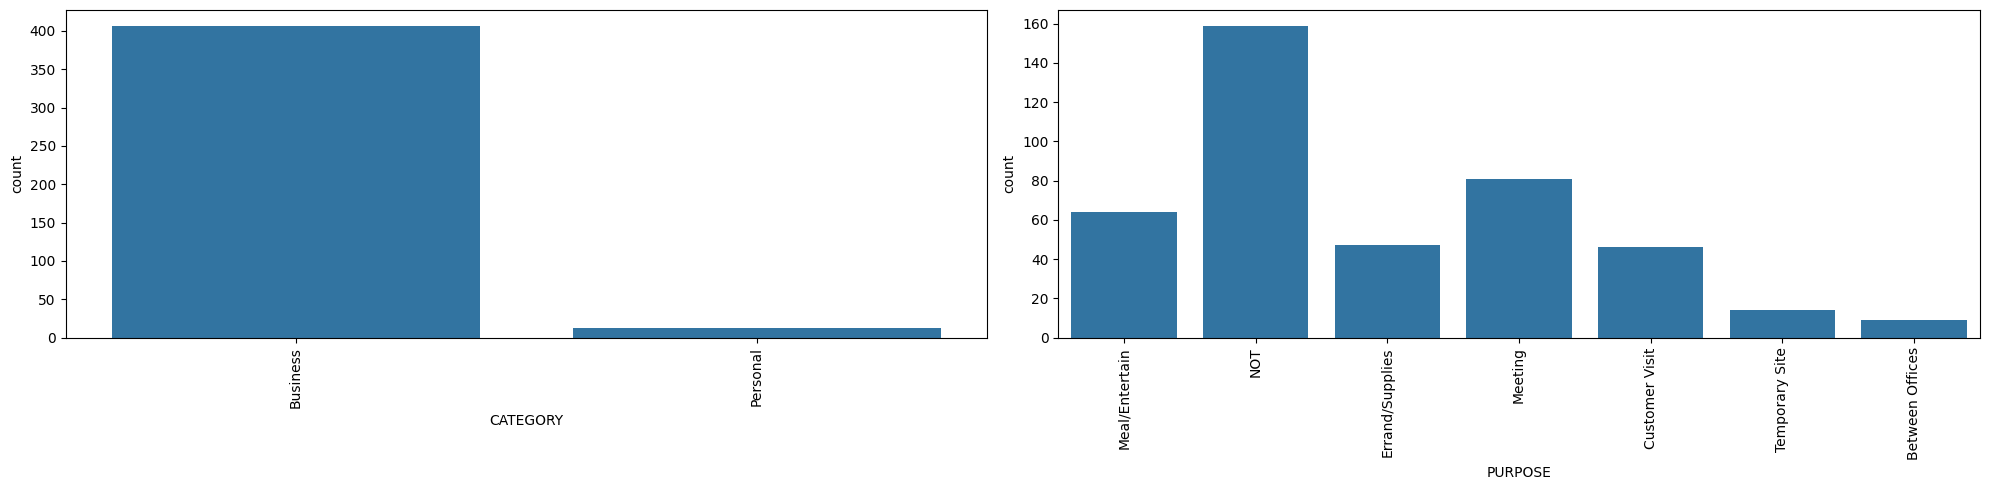

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ---------- Visualization 3: Day-Night ----------

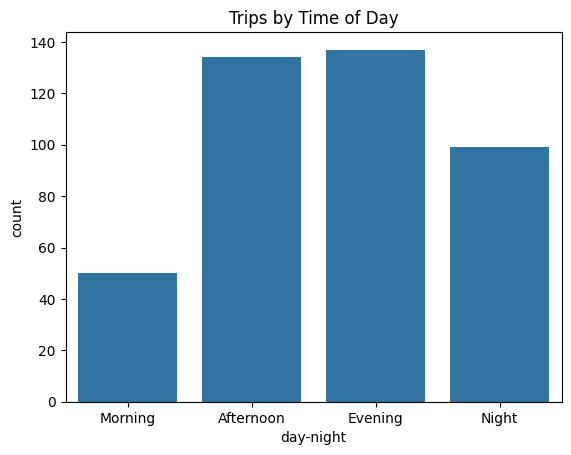

In [18]:
sns.countplot(x='day-night', data=dataset)
plt.title("Trips by Time of Day")
plt.show()

# Month-wise Analysis

In [20]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night MONTH  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night   Jan  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0    Morning   Jan  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night   Jan  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening   Jan  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon   Jan  


# Count and max miles per month

In [21]:
mon = dataset['MONTH'].value_counts(sort=False)
df = pd.DataFrame({
    "MONTHS": mon.index,
    "TRIPS": mon.values,
    "MAX_MILES": dataset.groupby('MONTH', sort=False)['MILES'].max().values
})

In [22]:
print(dataset.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night MONTH  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night   Jan  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0    Morning   Jan  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night   Jan  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening   Jan  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon   Jan  


# ---------------Visualization 4: Trips per Month -----------------

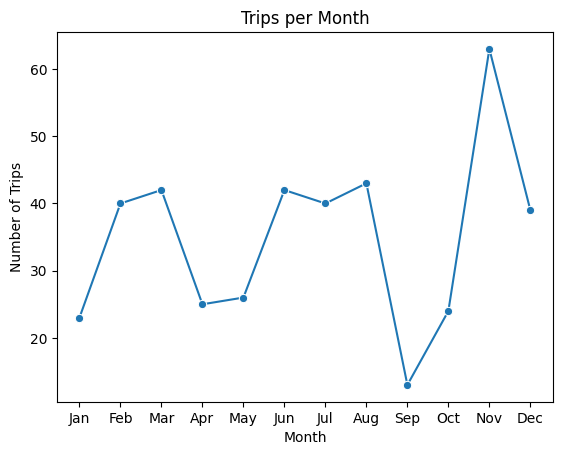

In [23]:
sns.lineplot(x="MONTHS", y="TRIPS", data=df, marker="o")
plt.title("Trips per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

# ----------Visualization 5: Day-wise Analysis ----------

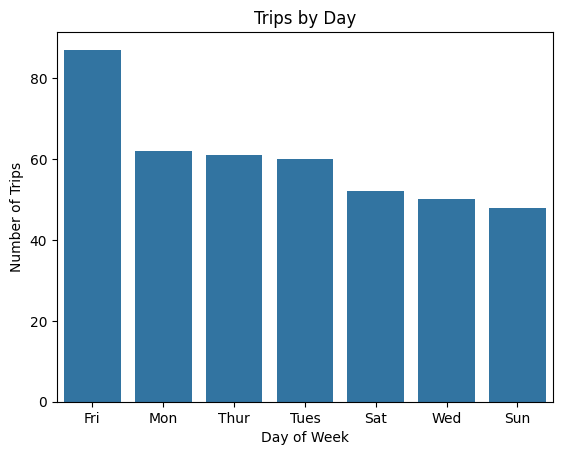

In [24]:
dataset['DAY'] = dataset['START_DATE'].dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

day_count = dataset['DAY'].value_counts()
sns.barplot(x=day_count.index, y=day_count.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Trips by Day")
plt.show()

# ----------Visualization 6: Journey Distance Analysis ----------

## ---------- Boxplot Analysis on Miles ----------

In [25]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'All Distances')

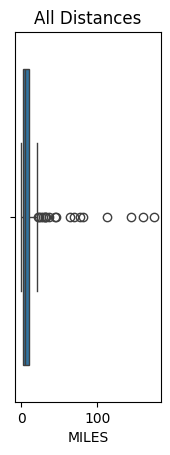

In [26]:
plt.subplot(1, 3, 1)
sns.boxplot(x=dataset['MILES'])
plt.title("All Distances")

Text(0.5, 1.0, 'Distances < 100')

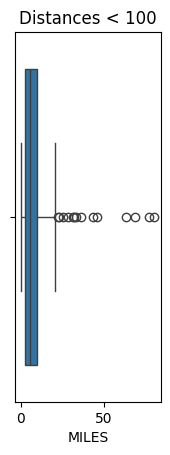

In [27]:
plt.subplot(1, 3, 2)
sns.boxplot(x=dataset[dataset['MILES'] < 100]['MILES'])
plt.title("Distances < 100")


Text(0.5, 1.0, 'Distances < 40')

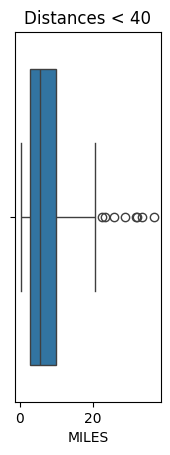

In [28]:
plt.subplot(1, 3, 3)
sns.boxplot(x=dataset[dataset['MILES'] < 40]['MILES'])
plt.title("Distances < 40")


In [30]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [31]:
plt.show()

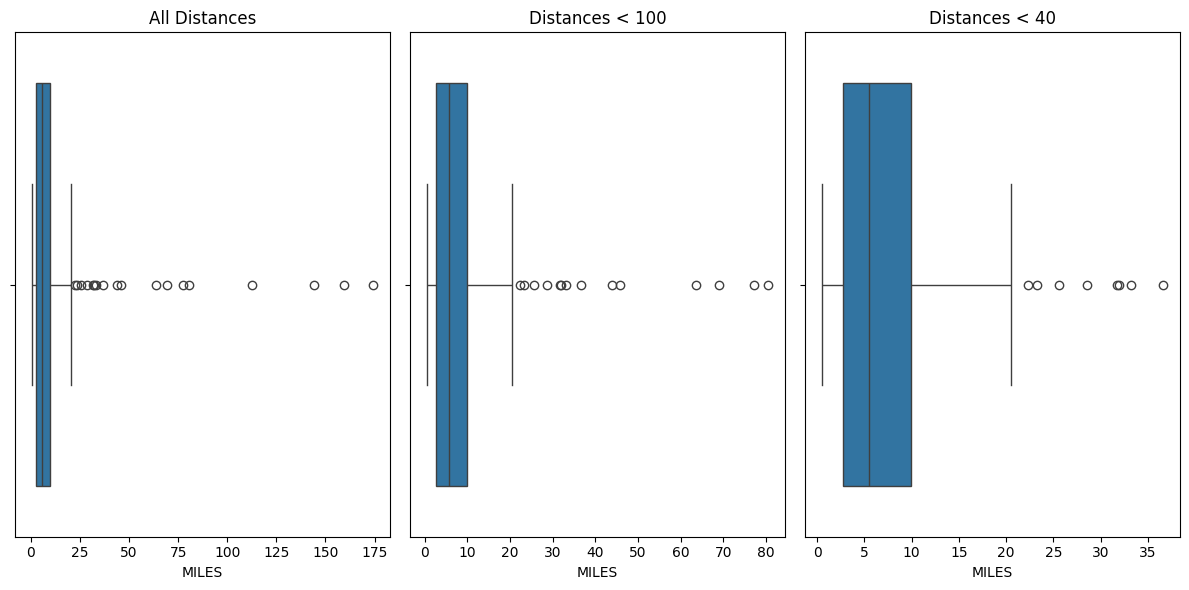

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=dataset['MILES'])
plt.title("All Distances")

plt.subplot(1, 3, 2)
sns.boxplot(x=dataset[dataset['MILES'] < 100]['MILES'])
plt.title("Distances < 100")

plt.subplot(1, 3, 3)
sns.boxplot(x=dataset[dataset['MILES'] < 40]['MILES'])
plt.title("Distances < 40")

plt.tight_layout()
plt.show()

## ---------- Histogram / Distribution Plot ----------

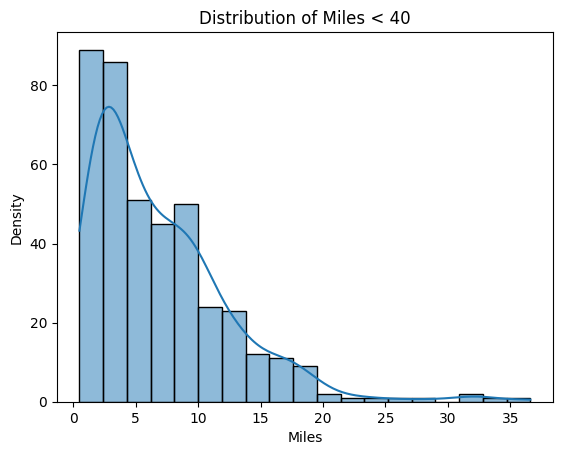

In [34]:
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True, colour=)
plt.title("Distribution of Miles < 40")
plt.xlabel("Miles")
plt.ylabel("Density")
plt.show()